In [13]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

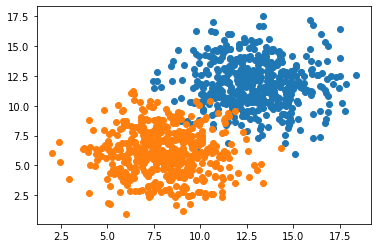

In [14]:
    n_pts = 500
    np.random.seed(0)
    Xa = np.array([np.random.normal(13, 2, n_pts),
                   np.random.normal(12, 2, n_pts)]).T
    Xb = np.array([np.random.normal(8, 2, n_pts),
                   np.random.normal(6, 2, n_pts)]).T
     
    X = np.vstack((Xa, Xb))
    y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
     
    plt.scatter(X[:n_pts,0], X[:n_pts,1])
    plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [17]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=500, shuffle='true')

Epoch 1/500
20/20 [==============================] - 0s 2ms/step - loss: 1.7697 - accuracy: 0.4144
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.6447
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8548
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8868
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.9364
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2544 - accuracy: 0.9589
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9597
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9669
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.9461
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.1769 - accuracy: 0.9567
Epoch 11/

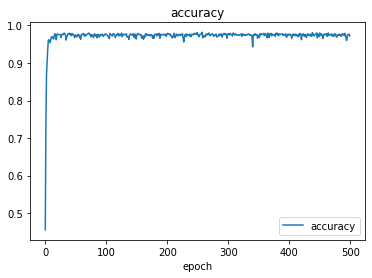

In [19]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

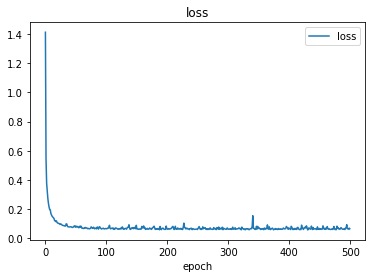

In [21]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [28]:
def plot_decision_boundary(X, y, model):
  x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 50)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)
  

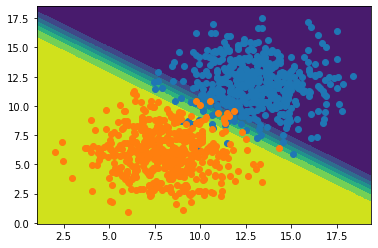

In [31]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is: [[0.9999968]]


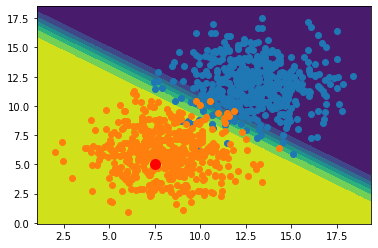

In [33]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker="o", markersize=10, color="red")
print("Prediction is:", prediction)